In [11]:
import sys
import os
import random
import albumentations as A
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

In [4]:
sys.path.append('/opt/ml/input/code')

In [5]:
from dataset import XRayDataset

In [6]:
data_test = XRayDataset(transforms=None)
img, label = data_test[500]

img = np.array(img.permute(1,2,0))
label = np.array(label.permute(1,2,0))

tf_cutmix = A.Compose([
    A.Crop(x_min=750, y_min=1250, x_max=1250, y_max=1750,p=1)
        ])
tran = tf_cutmix(image=img, mask=label)

In [7]:
def label2rgb(label):
    image_size = label.shape[:-1] + (3, )
    image = np.zeros(image_size, dtype=np.uint8)
    
    for i, class_label in enumerate(np.transpose(label,(2,0,1))):
        image[class_label == 1] = PALETTE[i]
        
    return image

PALETTE = [
    (220, 20, 60), (119, 11, 32), (0, 0, 142), (0, 0, 230), (106, 0, 228),
    (0, 60, 100), (0, 80, 100), (0, 0, 70), (0, 0, 192), (250, 170, 30),
    (100, 170, 30), (220, 220, 0), (175, 116, 175), (250, 0, 30), (165, 42, 42),
    (255, 77, 255), (0, 226, 252), (182, 182, 255), (0, 82, 0), (120, 166, 157),
    (110, 76, 0), (174, 57, 255), (199, 100, 0), (72, 0, 118), (255, 179, 240),
    (0, 125, 92), (209, 0, 151), (188, 208, 182), (0, 220, 176),
]

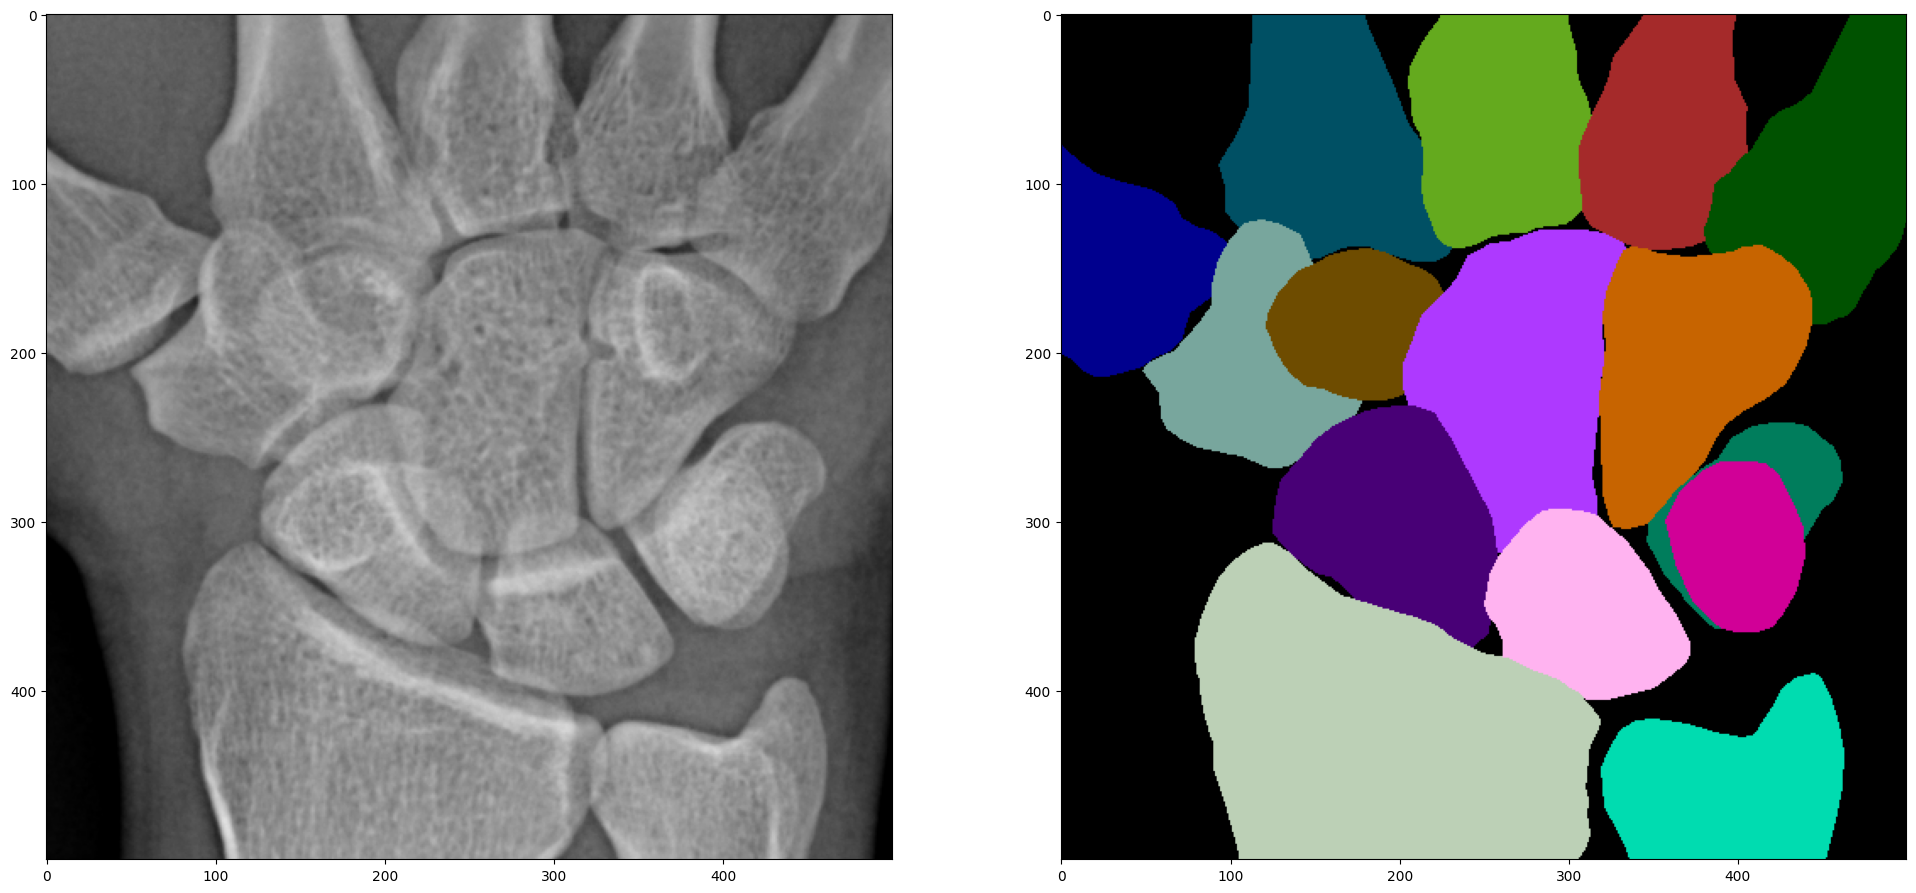

In [8]:
fig, ax = plt.subplots(1, 2, figsize=(24, 12))
ax[0].imshow(tran['image'])    # remove channel dimension
ax[1].imshow(label2rgb(tran['mask']))

plt.show()

In [9]:
img[2048-500:,0:500] = tran['image']
img[2048-500:,2048-500:] = tran['image']
label[2048-500:,0:500] = tran['mask']
label[2048-500:,2048-500:] = tran['mask']

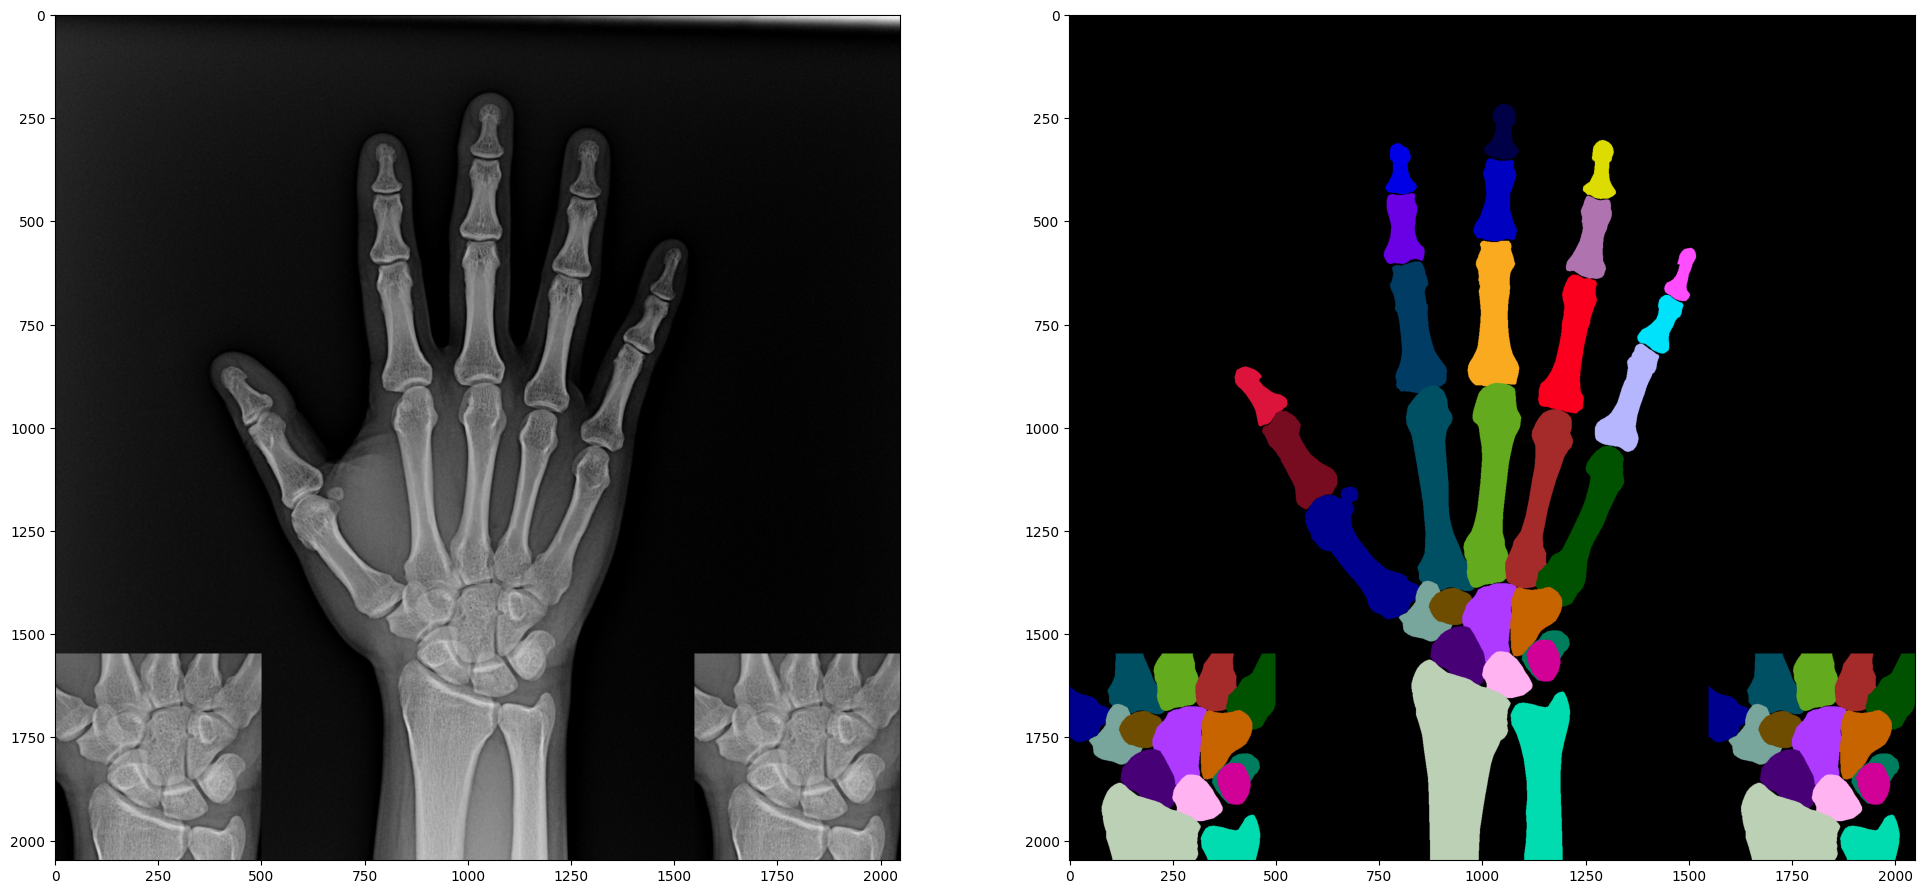

In [10]:
fig, ax = plt.subplots(1, 2, figsize=(24, 12))
ax[0].imshow(img)    # remove channel dimension
ax[1].imshow(label2rgb(label))

plt.show()

In [ ]:
def mosaic(img,label,p=0.5):
    
    if p < random.uniform(0,1):
        return img, label

    #손등 부분 crop
    tf_cutmix = A.Compose([
    A.Crop(x_min=750, y_min=1250, x_max=1250, y_max=1750,p=1)
        ])

    transform = tf_cutmix(image=img, mask=label)

    #아래 부분 양 옆 이미지 합성하기
    img[2048-500:,0:500] = transform['image']
    img[2048-500:,2048-500:] = transform['image']
    label[2048-500:,0:500] = transform['mask']
    label[2048-500:,2048-500:] = transform['mask']

    return img, label